<a href="https://colab.research.google.com/github/Rajeswari0410/Linear-Regression-Task1/blob/main/Second_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rajarajeswari** **Palacharla**
**TASK**-**2**

# **GRIPNOV20**

In this task we are going to predict the optimum number of clusters and represent it visually.

In [119]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [120]:
#Linking google drive to colab
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [121]:
#importing data
data = pd.read_csv('/content/gdrive/My Drive/Iris.csv')
print("Data imported successfully")

Data imported successfully


In [122]:
data.head() #display of first five rows in data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [123]:
data.tail() #display of last five rows in data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [124]:
#checking for empty cells/values:
print(data.isnull().sum())


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


So, we can say there are no empty values(NaN)

In [125]:
#Statistical measuresof all variables:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [126]:
#checking for unique types and their count:
print(data.nunique())
print(data.value_counts())

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64
Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
150  5.9            3.0           5.1            1.8           Iris-virginica     1
56   5.7            2.8           4.5            1.3           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
                                                                                 ..
100  5.7            2.8           4.1            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
97   5.7            2.9   

 Here we are having 3 types of Species: Setosa,Versicolor,Virginica.
 We will consider Species here.

# **Data** **Visualisation**

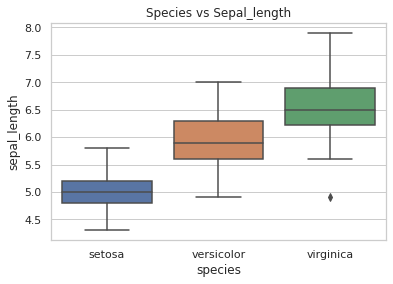

In [127]:
# For this type of data it will be better to use Boxplot
iris = sns.load_dataset('iris')
ax = sns.boxplot(x ='species',y ='sepal_length',data=iris)
plt.title('Species vs Sepal_length')
plt.show()

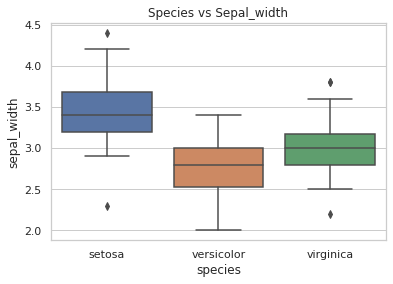

In [128]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title('Species vs Sepal_width')
plt.show()

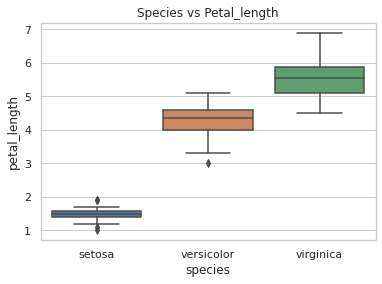

In [129]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.title('Species vs Petal_length')
plt.show()

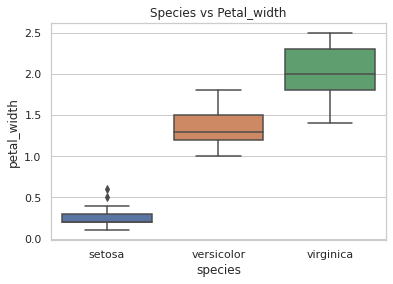

In [130]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title('Species vs Petal_width')
plt.show()

Now, we will plot the total count of each type of specie in dataset of iris

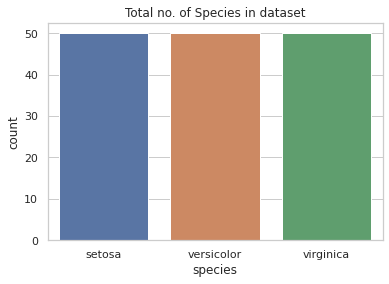

In [131]:
sns.countplot(x='species',data=iris)
plt.title("Total no. of Species in dataset")
plt.show()

# **Heat**-**Map** **for** **the** **Data**:

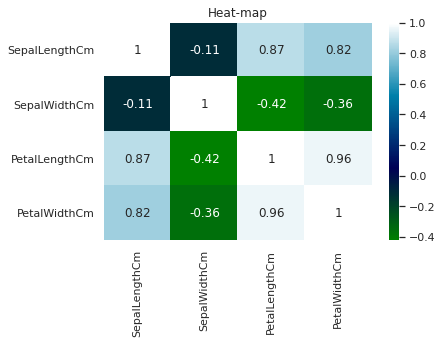

In [132]:
sns.heatmap(data[data.columns[1:]].corr(),annot=True,cmap='ocean')
plt.title('Heat-map')
plt.show()

Here, we excluded ID column and drawn heat-map

We plotted boxplots taking Species as reference axis above. We now plot pairplot for the remaining variables:

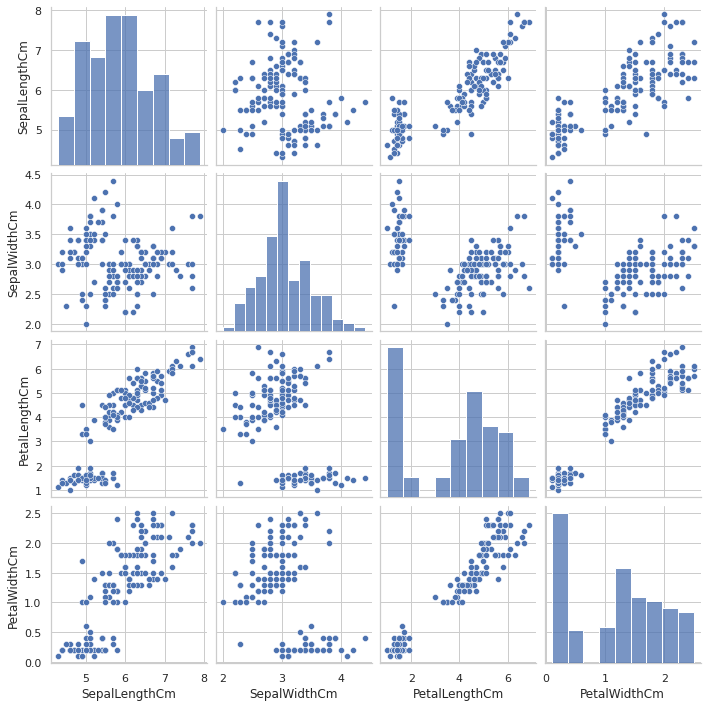

In [133]:
sns.pairplot(data[data.columns[1:]])

# **Optimization** for K-Means Classification

In [115]:
# Finding the optimum number of clusters 

x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(wcss)


[281831.54466666665]
[281831.54466666665, 70581.3808]
[281831.54466666665, 70581.3808, 31320.711199999998]
[281831.54466666665, 70581.3808, 31320.711199999998, 17762.657226173542]
[281831.54466666665, 70581.3808, 31320.711199999998, 17762.657226173542, 11423.238080088988]
[281831.54466666665, 70581.3808, 31320.711199999998, 17762.657226173542, 11423.238080088988, 7909.530673076923]
[281831.54466666665, 70581.3808, 31320.711199999998, 17762.657226173542, 11423.238080088988, 7909.530673076923, 5881.448116883117]
[281831.54466666665, 70581.3808, 31320.711199999998, 17762.657226173542, 11423.238080088988, 7909.530673076923, 5881.448116883117, 4562.7800793650795]
[281831.54466666665, 70581.3808, 31320.711199999998, 17762.657226173542, 11423.238080088988, 7909.530673076923, 5881.448116883117, 4562.7800793650795, 3579.72056127451]
[281831.54466666665, 70581.3808, 31320.711199999998, 17762.657226173542, 11423.238080088988, 7909.530673076923, 5881.448116883117, 4562.7800793650795, 3579.72056127

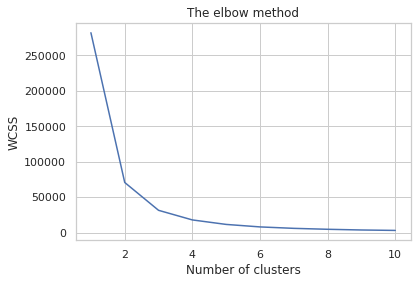

In [116]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From above ELBOW graph, we can say that after 3(no. of clusters) the WCSS  decrease only by a small amounts. Therefore we cluster the dataset into 3 clusters.

In [117]:
# Applying kmeans to the dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

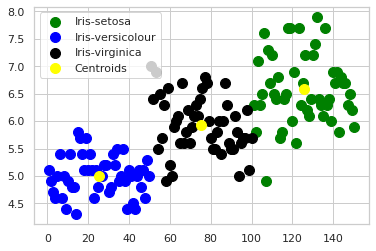

In [134]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'black', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Conclusion : The optimum number of clusters are 3 and it is also displayed visually.

**Thank** **you**